In [1]:
!pip install -U datasets --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 4.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json

with open("/content/drive/MyDrive/cs224r/rft/countdown-joint/v1.17/checkpoint-550/trainer_state.json", "r") as f:
  trainer_state = json.load(f)

In [ ]:
batches_to_exclude = [(m['step'], m['rewards/formula_match_v3/mean']) for m in trainer_state["log_history"] if m['rewards/formula_match_v3/mean'] <= 0.2]
len(batches_to_exclude) / len(trainer_state['log_history'])

0.36363636363636365

In [ ]:
with open("/content/drive/MyDrive/cs224r/rft/countdown-joint/batches_to_exclude_bs16.json", "w") as f:
  json.dump(batches_to_exclude, f)

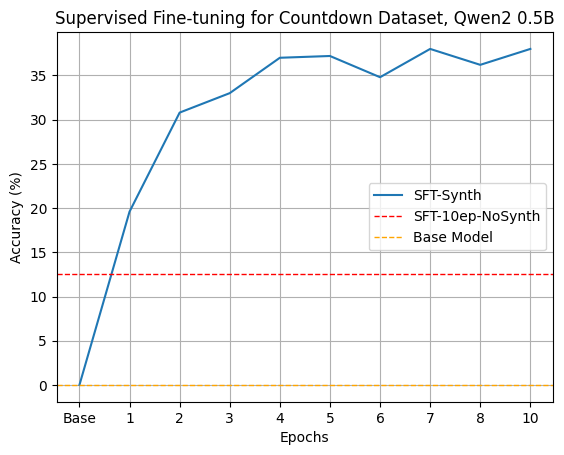

In [ ]:
import matplotlib.pyplot as plt

# Sample data
epochs = ["Base", 1, 2, 3, 4, 5, 6, 7, 8, 10]
values = [0, 19.6, 30.8, 33.0, 37.0, 37.2, 34.8, 38.0, 36.2, 38.0]

# Create bar chart
plt.plot(epochs, values, label="SFT-Synth")

# Add titles and labels
plt.title('Supervised Fine-tuning for Countdown Dataset, Qwen2 0.5B')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

plt.grid(True)
plt.axhline(y=12.5, color='red', linestyle='--', linewidth=1, label='SFT-10ep-NoSynth')
plt.axhline(y=0.0, color='orange', linestyle='--', linewidth=1, label='Base Model')
plt.legend()


# Show the plot
plt.show()
# plt.savefig("sft_summary.png")

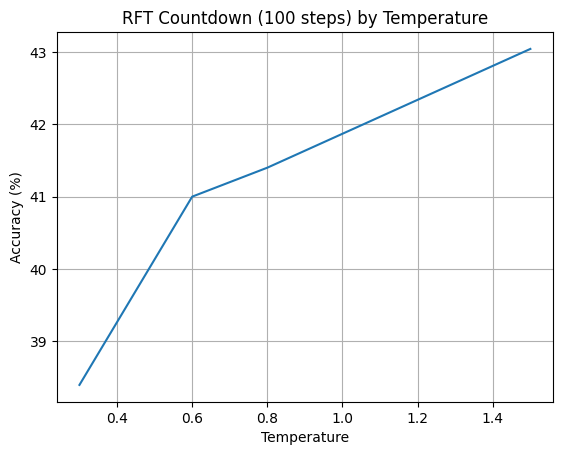

In [32]:
import matplotlib.pyplot as plt

# Sample data
epochs = [0.3, 0.6, 0.8, 1.5]
values = [38.4, 41.0, 41.4, 43.04]

# Create bar chart
plt.plot(epochs, values)
# plt.axhline(y=38.0, color='red', linestyle='--', linewidth=1, label='y = 10')

# Add titles and labels
plt.title('RFT Countdown (100 steps) by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Accuracy (%)')

plt.grid(True)

# Show the plot
plt.savefig("temp_sweep_v16.png")

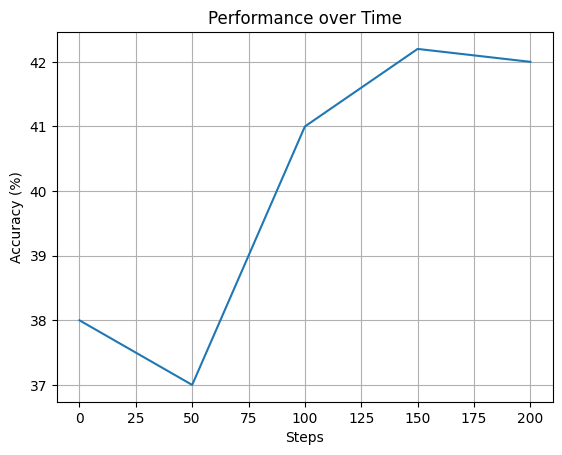

In [25]:
import matplotlib.pyplot as plt

# Sample data
# RFT-v1-50: 38.4% RFT-v1-100: 5.4% RFT-v1-150: 0.0% RFT-v1-200: 0.0%
steps = [0, 50, 100, 150, 200]
# values = [38.0, 38.4, 5.4, 0, 0]

# RFT-v16-50: 37.0% RFT-v16-100: 41.0% RFT-v16-150: 42.2% RFT-v16-200: 42.0%
values = [38.0, 37.0, 41.0, 42.2, 42.0]

# Create bar chart
plt.plot(steps, values)

# Add titles and labels
plt.title('Performance over Time')
plt.xlabel('Steps')
plt.ylabel('Accuracy (%)')

plt.grid(True)


# Show the plot
plt.savefig("val_perf_v16.png")

In [ ]:
import matplotlib.pyplot as plt

# Sample data
steps = ["38.4", 1, 2, 3, 4, 5, 6, 7, 8, 10]
values = [0, 19.6, 30.8, 33.0, 37.0, 37.2, 34.8, 38.0, 36.2, 38.0]

# Create bar chart
plt.plot(epochs, values, label="SFT-Synth")

# Add titles and labels
plt.title('Supervised Fine-tuning for Countdown Dataset, Qwen2 0.5B')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

plt.grid(True)
plt.axhline(y=12.5, color='red', linestyle='--', linewidth=1, label='SFT-10ep-NoSynth')
plt.axhline(y=0.0, color='orange', linestyle='--', linewidth=1, label='Base Model')
plt.legend()


# Show the plot
plt.show()
# plt.savefig("sft_summary.png")

In [133]:
!cp -R /content/drive/MyDrive/cs224r/rft/countdown-joint/v1.33.1/checkpoint-400/ /content/rft-checkpoints/checkpoint-400

In [134]:
import json

with open("/content/rft-checkpoints/checkpoint-400/trainer_state.json", "r") as f:
  metrics_collection = [step for step in json.load(f)['log_history'] if "rewards/formula_match_v3/mean" in step]

In [135]:
import matplotlib.pyplot as plt

# metrics_collection = None
num_gen = 16  # rft_training_args.num_generations

# metrics_collection = metrics_collection or [step for step in metrics_collection if "rewards/formula_match_v3/mean" in step]
steps = [step['step'] for step in metrics_collection]
accs = [step['rewards/formula_match_v3/mean'] for step in metrics_collection]
accs_errs = [step['rewards/formula_match_v3/std'] / (num_gen ** 0.5) for step in metrics_collection]
formats = [step['rewards/format_reward/mean'] for step in metrics_collection]
formats_errs = [step['rewards/format_reward/std'] / (num_gen ** 0.5) for step in metrics_collection]
# lens = [step['rewards/len_penalty/mean'] for step in metrics_collection]
# lens_errs = [step['rewards/len_penalty/std'] / (num_gen ** 0.5) for step in metrics_collection]
rewards = [step['reward'] for step in metrics_collection]
kls = [step['kl'] for step in metrics_collection]
grad_norms = [step['grad_norm'] for step in metrics_collection]

In [136]:
def tensorboard_smoothing(values, smoothing=0.6):
    """
    Applies TensorBoard-style exponential smoothing to a list of scalar values.

    Args:
        values (list or np.array): Sequence of values to smooth.
        smoothing (float): Smoothing factor between 0 and 1. Higher values mean more smoothing.

    Returns:
        list: Smoothed values.
    """
    if not values:
        return []

    smoothed = [values[0]]  # start with the first value
    for i in range(1, len(values)):
        previous = smoothed[-1]
        smoothed_val = smoothing * previous + (1 - smoothing) * values[i]
        smoothed.append(smoothed_val)

    return smoothed

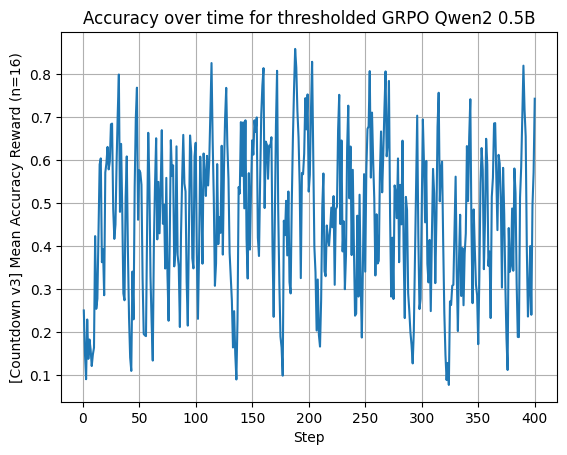

In [137]:
import numpy as np

plt.plot(steps, tensorboard_smoothing(accs))
plt.grid(True)
plt.xlabel("Step")
plt.ylabel("[Countdown v3] Mean Accuracy Reward (n=16)")
plt.title("Accuracy over time for thresholded GRPO Qwen2 0.5B")
plt.savefig("acc_v33.png")

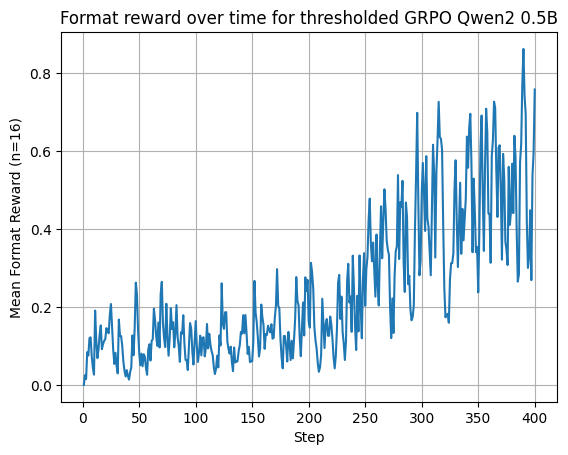

In [139]:
plt.plot(steps, tensorboard_smoothing(formats))
# plt.fill_between(steps, np.array(formats) - np.array(formats_errs), np.array(formats) + np.array(formats_errs), color='blue', alpha=0.3)
plt.grid(True)
plt.xlabel("Step")
plt.ylabel("Mean Format Reward (n=16)")
plt.title("Format reward over time for thresholded GRPO Qwen2 0.5B")
plt.savefig("fmt_v33.png")

In [3]:
import re
from sympy import sympify

def prompt_to_entry(text):
  m = re.match(r"[\s\S]+Using the numbers \[(.*)\], create an equation that equals (\d+)", text)
  nums, target = m.group(1), m.group(2)
  entry = ((tuple(sorted(int(i) for i in nums.split(', ')))), int(target))
  return entry

def formula_match_v3(prompts, completions, **kwargs):
  rewards = []
  for prompt, completion in zip(prompts, completions):
    target = int(
        re.match(r"[\s\S]*create an equation that equals (\d+).*", prompt).group(1)
    )
    ref_nums, _ = prompt_to_entry(prompt)
    answer = re.match(r"[\s\S]*<answer>(.*?)</answer>.*", completion)

    try:
      # Did we use duplicate numbers when we shouldn't have,
      # or hallucinate numbers to make the numbers work?
      cand_nums = [int(i) for i in re.findall(r"\d+", answer.group(1))]
      ref_counts = {i: ref_nums.count(i) for i in ref_nums}
      cand_counts = {i: cand_nums.count(i) for i in cand_nums}

      if any([cand_counts[i] > ref_counts.get(i, 0) for i in cand_counts]):
        rewards.append(0.0)
      else:
        candidate_target = sympify(answer.group(1))
        rewards.append(float(candidate_target == target))
    except:
      rewards.append(0.0)
  return rewards

In [105]:
import json
with open("/content/drive/MyDrive/cs224r/completions/rft-v30.json", "r") as f:
  completions_list_v16 = json.load(f)

with open("/content/drive/MyDrive/cs224r/completions/rft-v28.json", "r") as f:
  completions_list_v28 = json.load(f)

with open("/content/drive/MyDrive/cs224r/completions/rft-v32.json", "r") as f:
  completions_list_v32 = json.load(f)

In [5]:
from datasets import concatenate_datasets, load_dataset, Dataset
from itertools import islice
import re
import shutil
import torch

COUNTDOWN_PROMPT = (
    "A conversation between User and Assistant. The user asks a question, and the Assistant solves it. The assistant first thinks about the reasoning process in the mind and then provides the user with the answer.\n"
    "User: Using the numbers {nums}, create an equation that equals {target}. You can use basic arithmetic operations (+, -, *, /) and each number can only be used once. Show your work in <think> </think> tags. And return the final answer in <answer> </answer> tags, for example <answer> (1 + 2) / 3 </answer>.\n"
    "Assistant: Let me solve this step by step.\n<think>"
)


def reformat_o4m_synth_row(example):
  answer_start_idx = example['cot'].index("<answer>")
  example["completion"] = f"<think>{example['cot'][:answer_start_idx]}</think>{example['cot'][answer_start_idx:]}"
  example["prompt"] = COUNTDOWN_PROMPT.format(nums=example['numbers'], target=example['target'])
  del example['numbers'], example['target'], example['cot'], example['expression']
  return example


def prompt_to_entry(text):
  m = re.match(r"[\s\S]+Using the numbers \[(.*)\], create an equation that equals (\d+)", text)
  nums, target = m.group(1), m.group(2)
  entry = ((tuple(sorted(int(i) for i in nums.split(', ')))), int(target))
  return entry

def reformat_rft(example):
  example["prompt"] = COUNTDOWN_PROMPT.format(nums=example['nums'], target=example['target'])
  return example

def reformat_val(example):
  example["prompt"] += "\n<think>"
  return example

In [6]:
DATASET_TYPE = "COUNTDOWN"

if DATASET_TYPE == "MATH":
  # We may not use all 50k, but if we increase/decrease the dataset during exp.,
  # give some wiggle room so we can be consistent with the validation set.
  N_TOTAL = 50_000
  N_SFT_TRAIN_EXAMPLES = 10_000
  N_RFT_TRAIN_EXAMPLES = 500
  assert(N_SFT_TRAIN_EXAMPLES + N_RFT_TRAIN_EXAMPLES < N_TOTAL)
  N_VALID_EXAMPLES = 1_000

  # https://huggingface.co/datasets/PrimeIntellect/verifiable-math-problems/viewer/default/train?views%5B%5D=train&row=4
  dataset_stream = load_dataset("PrimeIntellect/verifiable-math-problems", split="train", streaming=True)
  dataset_slice = list(islice(dataset_stream, N_TOTAL + N_VALID_EXAMPLES))
  sft_train_dataset = Dataset.from_list(dataset_slice[:N_SFT_TRAIN_EXAMPLES])
  rft_train_dataset = Dataset.from_list(dataset_slice[N_SFT_TRAIN_EXAMPLES:N_SFT_TRAIN_EXAMPLES + N_RFT_TRAIN_EXAMPLES])
  valid_dataset = Dataset.from_list(dataset_slice[N_TOTAL:N_TOTAL + N_VALID_EXAMPLES])

  avg_toks_per_example = 0
  for example in sft_train_dataset:
    avg_toks_per_example += len(tokenizer(example['prompt'], add_special_tokens=True)['input_ids']) + len(tokenizer(example['gold_standard_solution'], add_special_tokens=True)['input_ids'])
  avg_toks_per_example = int(avg_toks_per_example / N_SFT_TRAIN_EXAMPLES)

  sft_train_dataset = sft_train_dataset.rename_column("gold_standard_solution", "completion")
  sft_train_dataset = sft_train_dataset.remove_columns([col for col in sft_train_dataset.column_names if col not in {"prompt", "completion"}])

elif DATASET_TYPE == "COUNTDOWN":
  # === COUNTDOWN V1 ===
  # sft_train_dataset = load_dataset("json", data_files="/content/drive/MyDrive/cs224r/data/synth_countdown_sft_10k.jsonl", split="train")\
  #     .rename_columns({"numbers": "nums", "cot": "completion"})\
  #     .map(create_countdown_prompt_column)\
  #     .remove_columns(["target", "nums"])
  # rft_train_dataset = load_dataset("predibase/countdown", split=f"train[:{N_RFT_TRAIN_EXAMPLES}]")\
  #   .map(create_countdown_prompt_column)
  # valid_dataset = load_dataset("predibase/countdown", split=f"train[{N_RFT_TRAIN_EXAMPLES}:]")\
  #   .map(create_countdown_prompt_column)
  # test_dataset = load_dataset("predibase/countdown", split="test")\
  #   .map(create_countdown_prompt_column)

  synth_dataset = load_dataset(
      "json",
      data_files="/content/drive/MyDrive/cs224r/data/synth_countdown_sft_10k.jsonl",
      split="train"
  ).map(reformat_o4m_synth_row)
  synth_train_dataset = synth_dataset.select(range(9700))
  synth_valid_dataset = synth_dataset.select(range(9700, 10000))  # val set 200 -> 500

  predet_train_dataset = load_dataset("Asap7772/cog_behav_all_strategies", split="train")\
        .rename_columns({"query": "prompt"})
  sft_train_dataset = concatenate_datasets([synth_train_dataset, predet_train_dataset])

  rft_train_dataset = load_dataset("Jiayi-Pan/Countdown-Tasks-3to4", split="train[:20000]")\
        .map(reformat_rft)

  valid_dataset = concatenate_datasets([
      load_dataset("Asap7772/cog_behav_all_strategies", split="test")\
        .rename_columns({"query": "prompt"})\
        .map(reformat_val),
      synth_valid_dataset
  ])

  TARGET_BANK = set()
  for row in valid_dataset:
    TARGET_BANK.add(prompt_to_entry(row["prompt"]))

  def remove_data_leaks(row):
    entry = prompt_to_entry(row['prompt'])
    return entry not in TARGET_BANK

  sft_train_dataset = sft_train_dataset.filter(remove_data_leaks)

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/410 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/474k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/107k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/200 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/314 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.85M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/490364 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10700 [00:00<?, ? examples/s]

In [83]:
len(completions_list_v16['completions'][-1])

500

In [31]:
len(completions_list_v28['completions'][0][0])

500

In [107]:
reward_floats_v16 = [formula_match_v3(prompts=valid_dataset["prompt"], completions=completions) for completions in [completions_list_v16['completions'][0]]]
flat_rewards_v16 = [it for coll in reward_floats_v16 for it in coll]
print(f"accuracy: {sum(flat_rewards_v16) / len(flat_rewards_v16) * 100}")

reward_floats_v28 = [formula_match_v3(prompts=valid_dataset["prompt"], completions=completions) for completions in completions_list_v28['completions'][-1]]
flat_rewards_v28 = [it for coll in reward_floats_v28 for it in coll]
print(f"accuracy: {sum(flat_rewards_v28) / len(flat_rewards_v28) * 100}")

reward_floats_v32 = [formula_match_v3(prompts=valid_dataset["prompt"], completions=completions) for completions in completions_list_v32['completions'][0]]
flat_rewards_v32 = [it for coll in reward_floats_v32 for it in coll]
print(f"accuracy: {sum(flat_rewards_v32) / len(flat_rewards_v32) * 100}")

accuracy: 42.199999999999996
accuracy: 40.6
accuracy: 39.879999999999995


In [88]:
def get_stats(compl):
  try:
    a = re.match("[\s\S]+<answer>(.*)</answer>[\s\S]*", compl).group(1).strip()
    return {
        "+": a.count("+"),
        "-": a.count("-"),
        "*": a.count("*"),
        "/": a.count("/"),
    }
  except:
    return {}

stats = [get_stats(compl) for compl in valid_dataset['completion']]

In [127]:
wrong = {"+": 0, "-": 0, "*": 0, "/": 0}
tots = {"+": 0, "-": 0, "*": 0, "/": 0}
for i in range(len(reward_floats_v16)):
  for is_correct, op_counts in zip(reward_floats_v16[i], stats):
    if not is_correct:
      wrong['+'] += op_counts.get('+', 0)
      wrong['-'] += op_counts.get('-', 0)
      wrong['*'] += op_counts.get('*', 0)
      wrong['/'] += op_counts.get('/', 0)
    tots['+'] += op_counts.get('+', 0)
    tots['-'] += op_counts.get('-', 0)
    tots['*'] += op_counts.get('*', 0)
    tots['/'] += op_counts.get('/', 0)

for k in tots:
  print(f"{k}: {wrong[k] / tots[k]:.02f}")

lens = {"t": 0, "f": 0}
tots = {"t": 0, "f": 0}
for i in range(len(reward_floats_v16)):
  for is_correct, op_counts in zip(reward_floats_v16[i], stats):
    if not is_correct:
      if sum(op_counts.values()) + 1 == 4:
        lens['f'] += 1
      else:
        lens['t'] += 1
    if sum(op_counts.values()) + 1 == 4:
      tots['f'] += 1
    else:
      tots['t'] += 1

print()
for k in tots:
  print(f"{k}: {lens[k] / tots[k]:.02f}")

+: 0.57
-: 0.67
*: 0.62
/: 0.61

t: 0.44
f: 0.73


In [126]:
wrong = {"+": 0, "-": 0, "*": 0, "/": 0}
tots = {"+": 0, "-": 0, "*": 0, "/": 0}
for i in range(len(reward_floats_v28)):
  for is_correct, op_counts in zip(reward_floats_v28[i], stats):
    if not is_correct:
      wrong['+'] += op_counts.get('+', 0)
      wrong['-'] += op_counts.get('-', 0)
      wrong['*'] += op_counts.get('*', 0)
      wrong['/'] += op_counts.get('/', 0)
    tots['+'] += op_counts.get('+', 0)
    tots['-'] += op_counts.get('-', 0)
    tots['*'] += op_counts.get('*', 0)
    tots['/'] += op_counts.get('/', 0)

for k in tots:
  print(f"{k}: {wrong[k] / tots[k]:.02f}")

lens = {"t": 0, "f": 0}
tots = {"t": 0, "f": 0}
for i in range(len(reward_floats_v28)):
  for is_correct, op_counts in zip(reward_floats_v28[i], stats):
    if not is_correct:
      if sum(op_counts.values()) + 1 == 4:
        lens['f'] += 1
      else:
        lens['t'] += 1
    if sum(op_counts.values()) + 1 == 4:
      tots['f'] += 1
    else:
      tots['t'] += 1

print()
for k in tots:
  print(f"{k}: {lens[k] / tots[k]:.02f}")

+: 0.56
-: 0.68
*: 0.61
/: 0.66

t: 0.46
f: 0.75


In [125]:
wrong = {"+": 0, "-": 0, "*": 0, "/": 0}
tots = {"+": 0, "-": 0, "*": 0, "/": 0}
for i in range(len(reward_floats_v32)):
  for is_correct, op_counts in zip(reward_floats_v32[i], stats):
    if not is_correct:
      wrong['+'] += op_counts.get('+', 0)
      wrong['-'] += op_counts.get('-', 0)
      wrong['*'] += op_counts.get('*', 0)
      wrong['/'] += op_counts.get('/', 0)
    tots['+'] += op_counts.get('+', 0)
    tots['-'] += op_counts.get('-', 0)
    tots['*'] += op_counts.get('*', 0)
    tots['/'] += op_counts.get('/', 0)

for k in tots:
  print(f"{k}: {wrong[k] / tots[k]:.02f}")

lens = {"t": 0, "f": 0}
tots = {"t": 0, "f": 0}
for i in range(len(reward_floats_v32)):
  for is_correct, op_counts in zip(reward_floats_v32[i], stats):
    if not is_correct:
      if sum(op_counts.values()) + 1 == 4:
        lens['f'] += 1
      else:
        lens['t'] += 1
    if sum(op_counts.values()) + 1 == 4:
      tots['f'] += 1
    else:
      tots['t'] += 1

print()
for k in tots:
  print(f"{k}: {lens[k] / tots[k]:.02f}")

+: 0.58
-: 0.71
*: 0.64
/: 0.64

t: 0.45
f: 0.78


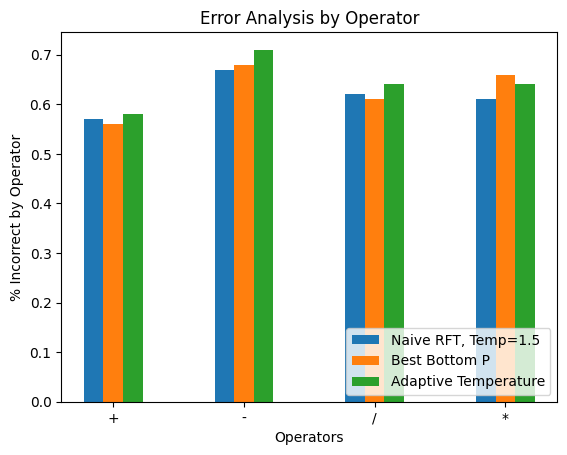

In [119]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)  # the label locations
width = 0.15  # width of the bars

# Plotting
plt.bar(x - width, [.57, .67, .62, .61], width, label='Naive RFT, Temp=1.5')
plt.bar(x, [.56, .68, .61, .66], width, label='Best Bottom P')
plt.bar(x + width, [.58, .71, .64, .64], width, label='Adaptive Temperature')
plt.xlabel("Operators")
plt.ylabel("% Incorrect by Operator")
plt.xticks(x, ["+", "-", "/", "*"])
plt.legend(loc='lower right')
plt.title("Error Analysis by Operator")
plt.savefig("operator_errors.png")

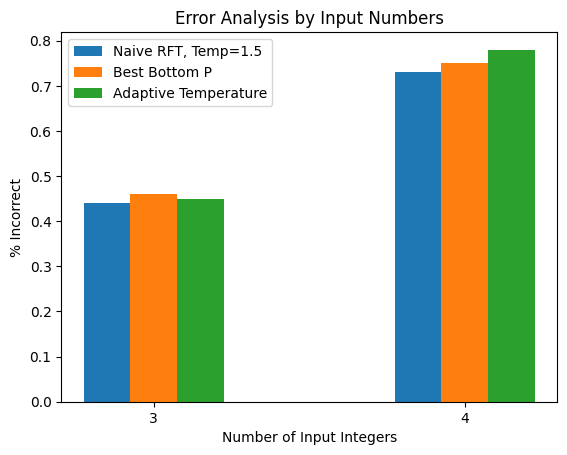

In [129]:
import matplotlib.pyplot as plt

# plt.bar(["3", "4"], [470 / 4, 724 / 4])


import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2)  # the label locations
width = 0.15  # width of the bars

# Plotting
plt.bar(x - width, [.44, .73], width, label='Naive RFT, Temp=1.5')
plt.bar(x, [.46, .75], width, label='Best Bottom P')
plt.bar(x + width, [.45, .78], width, label='Adaptive Temperature')
plt.xlabel("Number of Input Integers")
plt.ylabel("% Incorrect")
plt.title("Error Analysis by Input Numbers")
plt.xticks(x, ["3", "4"])
plt.legend()
plt.savefig("num_len_errors.png")